In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import scipy.stats as stats
import seaborn as sns
from matplotlib.colors import Normalize, LinearSegmentedColormap
from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_classif

# Comparison of Attention Proxies

As public and investor attention are latent variables, we need to find proxies to stand in their place. They should ideally all be correlated to some extent, so that we can make sure they are all measuring/quantifying the same thing.

* Google Trends: 
DA, Z., ENGELBERG, J. and GAO, P. (2011), In Search of Attention. The Journal of Finance, 66: 1461-1499. https://doi.org/10.1111/j.1540-6261.2011.01679.x

* GDELT:
SHEN, S., XIA, L., SHUAI, Y., GAO, D. (2022), Measuring news media sentiment using big data for Chinese stock markets. Pacific-Basin Finance Journal, 74: 101810. https://doi.org/10.1016/j.pacfin.2022.101810




In [19]:
# Read the data
stocks = ['ALV.DE', 'BRK-B', 'BTC-USD', 'DOGE-USD', 'ETH-USD', 'JPM', 'MSFT', 'NESN.SW', 'NVDA', 'TSLA', 'WIX']
names = ['Allianz', 'Berkshire Hathaway', 'Bitcoin', 'Dogecoin', 'Ethereum', 'JP Morgan', 'Microsoft', 'Nestle', 'Nvidia', 'Tesla', 'Wix.com']
labels = ['Price (Open)', 'Price (Close)', 'Google Trends Score', 'GDELT Article Volume', 'GDELT Sentiment Score', 'Trading Volume']
xlabels = ['Price (Open)', 'Price (Close)', 'Google\nTrends Score', 'GDELT\nArticle Volume', 'GDELT\nSentiment Score', 'Trading Volume']


corr_stat = np.zeros((len(labels), len(labels)))
corr_p = np.zeros((len(labels), len(labels)))

for i, stock in enumerate(stocks):
    name = names[i]
    filename = stock + '.csv'
    path = os.path.join('data', filename)
    df = pd.read_csv(path, comment='#', index_col=0)
    # df.index = pd.to_datetime(df.index)
    # dates = df.index.to_numpy()
    priceO = df[stock + ' (Open)'].to_numpy()
    priceC = df[stock + ' (Close)'].to_numpy()
    gtrends = df['Google Trends Score ' + name].to_numpy()
    article = df['GDELT Article Volume'].to_numpy()
    sentiment = df['GDELT Sentiment Score'].to_numpy()
    trading = df[stock + ' Trading Volume'].to_numpy()

    data = np.array([priceO, priceC, gtrends, article, sentiment, trading])

    for i, column1 in enumerate(labels):
        for j, column2 in enumerate(labels):
            if column1 != column2:
                corr_stat[i][j] += stats.pearsonr(data[i], data[j])[0]
            else:
                corr_stat[i][j] = np.NaN
                corr_p[i][j] = np.NaN

corr_stat = corr_stat / len(stocks)
corr_p = corr_p / len(stocks)


## DOES IT MAKE SENSE TAKING THE AVERAGE OF ALL THE p-values?

print(corr_stat)

[[            nan  9.97602180e-01  2.51275210e-01  2.09496846e-01
  -1.52852711e-04  6.28832171e-03]
 [ 9.97602180e-01             nan  2.52327884e-01  2.07014105e-01
   2.38790344e-03  6.77298873e-03]
 [ 2.51275210e-01  2.52327884e-01             nan  3.87512990e-01
  -1.05947527e-01  3.38106073e-01]
 [ 2.09496846e-01  2.07014105e-01  3.87512990e-01             nan
  -1.69756825e-01  1.72662400e-01]
 [-1.52852711e-04  2.38790344e-03 -1.05947527e-01 -1.69756825e-01
              nan -1.33930970e-01]
 [ 6.28832171e-03  6.77298873e-03  3.38106073e-01  1.72662400e-01
  -1.33930970e-01             nan]]


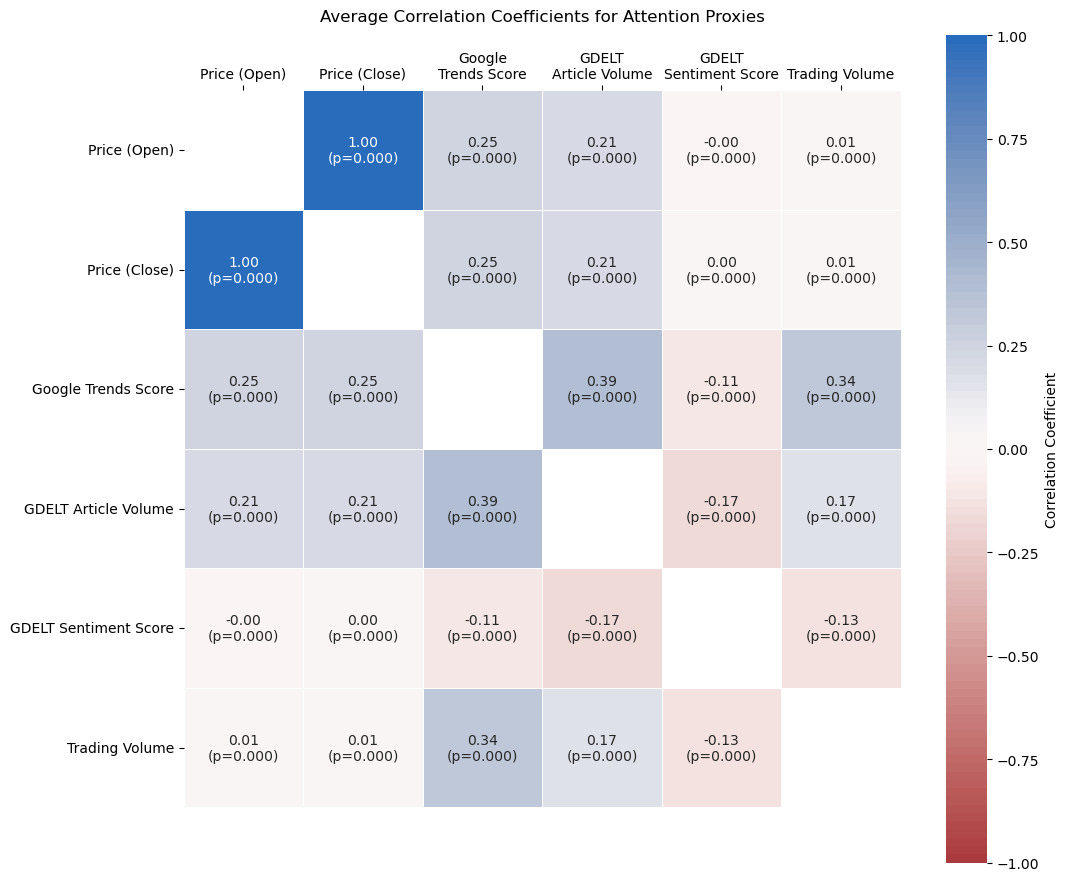

In [20]:
# Define a custom color palette
# num_bins = 100
# red_blue_gradient = sns.color_palette("vlag",  num_bins)
# blue_gradient.insert(0, (1, 1, 1))  # insert white at the beginning for -0.1
# custom_cmap_visible = LinearSegmentedColormap.from_list('custom_blue', red_blue_gradient, N=num_bins)
n_plots = 100
palette = sns.color_palette("vlag", n_colors=n_plots)
palette.reverse()
norm = Normalize(vmin=-1, vmax=1)  # Normalizing from -1 to 1

# Define precision variables
prec1 = 2
prec2 = 3

# Define the matrix with format placeholders
annot = np.empty_like(corr_stat, dtype=object)
for i in range(corr_stat.shape[0]):
    for j in range(corr_stat.shape[1]):
        if not np.isnan(corr_p[i][j]):
            annot[i, j] = '{:.{prec1}f}\n(p={:.{prec2}f})'.format(corr_stat[i][j], corr_p[i][j], prec1=prec1, prec2=prec2)
        else:
            annot[i, j] = ''




# Plotting
# sns.set_theme(style="white")
plt.figure(figsize=(11, 9))
heatmap = sns.heatmap(corr_stat, cmap=palette, norm=norm, annot=annot, fmt = '', xticklabels=xlabels, yticklabels=labels,
                      cbar_kws={"ticks": np.linspace(-1, 1, 9), 'label': 'Correlation Coefficient'}, linewidths=.5, square=True)

# Move the x-axis to the top of the figure
heatmap.xaxis.tick_top()
heatmap.xaxis.set_label_position('top')

# Adjust the x-axis labels to be horizontal and for two lines
plt.xticks(rotation=0, ha='center')
plt.yticks(rotation=0)
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize=10)
plt.tight_layout()

plt.title(f'Average Correlation Coefficients for Attention Proxies', pad=50)
plt.savefig('img/attention_proxies/correlation_matrix.png')
# Show the plot
plt.show()


In [22]:
# Read the data
stocks = ['ALV.DE', 'BRK-B', 'BTC-USD', 'DOGE-USD', 'ETH-USD', 'JPM', 'MSFT', 'NESN.SW', 'NVDA', 'TSLA', 'WIX']
names = ['Allianz', 'Berkshire Hathaway', 'Bitcoin', 'Dogecoin', 'Ethereum', 'JP Morgan', 'Microsoft', 'Nestle', 'Nvidia', 'Tesla', 'Wix.com']
labels = ['Price (Open)', 'Price (Close)', 'Google Trends Score', 'GDELT Article Volume', 'GDELT Sentiment Score', 'Trading Volume']
xlabels = ['Price (Open)', 'Price (Close)', 'Google\nTrends Score', 'GDELT\nArticle Volume', 'GDELT\nSentiment Score', 'Trading Volume']


corr_stat = np.zeros((len(labels), len(labels)))
corr_p = np.zeros((len(labels), len(labels)))

for i, stock in enumerate(stocks):
    name = names[i]
    filename = stock + '.csv'
    path = os.path.join('data', filename)
    df = pd.read_csv(path, comment='#', index_col=0)
    priceO = df[stock + ' (Open)'].to_numpy()
    priceC = df[stock + ' (Close)'].to_numpy()
    gtrends = df['Google Trends Score ' + name].to_numpy()
    article = df['GDELT Article Volume'].to_numpy()
    sentiment = df['GDELT Sentiment Score'].to_numpy()
    trading = df[stock + ' Trading Volume'].to_numpy()

    data = np.array([priceO, priceC, gtrends, article, sentiment, trading])

    for i, column1 in enumerate(labels):
        for j, column2 in enumerate(labels):
            if column1 != column2:
                corr_stat[i][j] = stats.pearsonr(data[i], data[j])[0]
                corr_p[i][j] = stats.pearsonr(data[i], data[j])[1]
            else:
                corr_stat[i][j] = np.NaN
                corr_p[i][j] = np.NaN

    norm = Normalize(vmin=-1, vmax=1)  # Normalizing from -1 to 1

    # Define precision variables
    prec1 = 2
    prec2 = 3

    # Define the matrix with format placeholders
    annot = np.empty_like(corr_stat, dtype=object)
    for i in range(corr_stat.shape[0]):
        for j in range(corr_stat.shape[1]):
            if not np.isnan(corr_p[i][j]):
                annot[i, j] = '{:.{prec1}f}\n(p={:.{prec2}f})'.format(corr_stat[i][j], corr_p[i][j], prec1=prec1, prec2=prec2)
            else:
                annot[i, j] = ''




    # Plotting
    n_plots = 100
    palette = sns.color_palette("vlag", n_colors=n_plots)
    palette.reverse()
    # sns.set_theme(style="white")
    plt.figure(figsize=(11, 9))
    heatmap = sns.heatmap(corr_stat, cmap=palette, norm=norm, annot=annot, fmt = '', xticklabels=xlabels, yticklabels=labels,
                        cbar_kws={"ticks": np.linspace(-1, 1, 9), 'label': 'Correlation Coefficient'}, linewidths=.5, square=True)

    # Move the x-axis to the top of the figure
    heatmap.xaxis.tick_top()
    heatmap.xaxis.set_label_position('top')

    # Adjust the x-axis labels to be horizontal and for two lines
    plt.xticks(rotation=0, ha='center')
    plt.yticks(rotation=0)
    heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize=10)
    plt.tight_layout()

    plt.title(f'Correlation Coefficients for Attention Proxies: ' + str(name), pad=50)
    plt.savefig('img/attention_proxies/individual/correlation_matrix_' + str(stock) + '.png')
    # Show the plot
    # plt.show()
    plt.close()



# Mutual information analysis

In [21]:
from jpype import *

#start JVM by telling where the java path and the jar file you want to use are
if isJVMStarted() == False:
    jarLocation = f'Java Development Kit\infodynamics.jar' #path to infodynamics.jar
    jvmPath = f'C:\\Program Files\\Java\\jdk-22\\bin\\server\\jvm.dll' #path to JVM.dll
    startJVM(jvmPath, "-ea", "-Djava.class.path=" + jarLocation)

In [30]:
implementingClass = "infodynamics.measures.continuous.kraskov.MutualInfoCalculatorMultiVariateKraskov1"

indexOfLastDot = implementingClass.rfind(".")
implementingPackage = implementingClass[:indexOfLastDot]
implementingBaseName = implementingClass[indexOfLastDot+1:]
miCalcClass = eval('JPackage(\'%s\').%s' % (implementingPackage, implementingBaseName))
miCalc = miCalcClass()

miCalc.initialise(1, 1)

miCalc.setObservations(gtrends, article)

miUnivariateValue = miCalc.computeAverageLocalOfObservations()
mipValue = miCalc.computeSignificance(1000).pValue

In [29]:
print("miUnivariateValue: {:.3f}, mipValue: {:.3f}".format(miUnivariateValue, mipValue))

miUnivariateValue: 0.069, mipValue: 0.000


# Transfer entropy analysis

In [20]:
from jpype import *

#start JVM by telling where the java path and the jar file you want to use are
if isJVMStarted() == False:
    jarLocation = f'Java Development Kit\infodynamics.jar' #path to infodynamics.jar
    jvmPath = f'C:\\Program Files\\Java\\jdk-22\\bin\\server\\jvm.dll' #path to JVM.dll
    startJVM(jvmPath, "-ea", "-Djava.class.path=" + jarLocation)

In [35]:
#First, we create a reference to the package and class that you wish to create an instance of
calcTE = JPackage("infodynamics.measures.continuous.kraskov").TransferEntropyCalculatorKraskov

#Then we need to create an instance of the class
calc_te = calcTE()

# We initialise the class with desired parameters
# 1.history length k of target x, 
# 2. k_tau - delay for the target  
# 3.history length of source y 
# 4. l_tau - delay for the source
# 5.coupling delay u
kx = ky = 2

ltau = ktau = 0

stat_GA = 0
stat_GT = 0
stat_GS = 0
stat_AG = 0
stat_AT = 0
stat_AS = 0
stat_TG = 0
stat_TA = 0
stat_TS = 0
stat_SG = 0
stat_SA = 0
stat_ST = 0

pVal_GA = 0
pVal_GT = 0
pVal_GS = 0
pVal_AG = 0
pVal_AT = 0
pVal_AS = 0
pVal_TG = 0
pVal_TA = 0
pVal_TS = 0
pVal_SG = 0
pVal_SA = 0
pVal_ST = 0

# this loop took me about 30 minutes to run
for i, stock in enumerate(stocks):
    name = names[i]
    filename = stock + '.csv'
    path = os.path.join('data', filename)
    df = pd.read_csv(path, comment='#', index_col=0)
    # df.index = pd.to_datetime(df.index)
    # dates = df.index.to_numpy()
    # price = df[stock + ' (Open)'].to_numpy()
    gtrends = df['Google Trends Score ' + name].to_numpy()
    article = df['GDELT Article Volume'].to_numpy()
    trading = df[stock + ' Trading Volume'].to_numpy()
    sentiment = df['GDELT Sentiment Score'].to_numpy()

    print("calculating stock", stock)

    #initialise the calculator
    calc_te.initialise(kx,ktau,ky,ltau,1)

    #set observations: first is the source variable, second is the target variable. then compute the resulting transfer entropy
    calc_te.setObservations(gtrends,article)
    stat_GA += calc_te.computeAverageLocalOfObservations()
    pVal_GA += calc_te.computeSignificance(1000).pValue
    calc_te.setObservations(gtrends,trading)
    stat_GT += calc_te.computeAverageLocalOfObservations()
    pVal_GT += calc_te.computeSignificance(1000).pValue
    calc_te.setObservations(gtrends,sentiment)
    stat_GS += calc_te.computeAverageLocalOfObservations()
    pVal_GS += calc_te.computeSignificance(1000).pValue
    calc_te.setObservations(article,gtrends)
    stat_AG += calc_te.computeAverageLocalOfObservations()
    pVal_AG += calc_te.computeSignificance(1000).pValue
    calc_te.setObservations(article,trading)
    stat_AT += calc_te.computeAverageLocalOfObservations()
    pVal_AT += calc_te.computeSignificance(1000).pValue
    calc_te.setObservations(article,sentiment)
    stat_AS += calc_te.computeAverageLocalOfObservations()
    pVal_AS += calc_te.computeSignificance(1000).pValue
    print("halfway")
    calc_te.setObservations(trading,gtrends)
    stat_TG += calc_te.computeAverageLocalOfObservations()
    pVal_TG += calc_te.computeSignificance(1000).pValue
    calc_te.setObservations(trading,article)
    stat_TA += calc_te.computeAverageLocalOfObservations()
    pVal_TA += calc_te.computeSignificance(1000).pValue
    calc_te.setObservations(trading,sentiment)
    stat_TS += calc_te.computeAverageLocalOfObservations()
    pVal_TS += calc_te.computeSignificance(1000).pValue
    calc_te.setObservations(sentiment,gtrends)
    stat_SG += calc_te.computeAverageLocalOfObservations()
    pVal_SG += calc_te.computeSignificance(1000).pValue
    calc_te.setObservations(sentiment,article)
    stat_SA += calc_te.computeAverageLocalOfObservations()
    pVal_SA += calc_te.computeSignificance(1000).pValue
    calc_te.setObservations(sentiment,trading)
    stat_ST += calc_te.computeAverageLocalOfObservations()
    pVal_ST += calc_te.computeSignificance(1000).pValue

stat_GA /= len(stocks)
stat_GT /= len(stocks)
stat_GS /= len(stocks)
stat_AG /= len(stocks)
stat_AT /= len(stocks)
stat_AS /= len(stocks)
stat_TG /= len(stocks)
stat_TA /= len(stocks)
stat_TS /= len(stocks)
stat_SG /= len(stocks)
stat_SA /= len(stocks)
stat_ST /= len(stocks)

pVal_GA /= len(stocks)
pVal_GT /= len(stocks)
pVal_GS /= len(stocks)
pVal_AG /= len(stocks)
pVal_AT /= len(stocks)
pVal_AS /= len(stocks)
pVal_TG /= len(stocks)
pVal_TA /= len(stocks)
pVal_TS /= len(stocks)
pVal_SG /= len(stocks)
pVal_SA /= len(stocks)
pVal_ST /= len(stocks)


calculating stock ALV.DE
halfway
calculating stock BRK-B
halfway
calculating stock BTC-USD
halfway
calculating stock DOGE-USD
halfway
calculating stock ETH-USD
halfway
calculating stock JPM
halfway
calculating stock MSFT
halfway
calculating stock NESN.SW
halfway
calculating stock NVDA
halfway
calculating stock TSLA
halfway
calculating stock WIX
halfway


In [6]:
# np.save('npdata/transferEntropy.npy', np.array([stat_GA, stat_GT, stat_GS, stat_AG, stat_AT, stat_AS, stat_TG, stat_TA, stat_TS, stat_SG, stat_SA, stat_ST]))
# np.save('npdata/pValues.npy', np.array([pVal_GA, pVal_GT, pVal_GS, pVal_AG, pVal_AT, pVal_AS, pVal_TG, pVal_TA, pVal_TS, pVal_SG, pVal_SA, pVal_ST]))

transferEntropy = np.load('npdata/transferEntropy.npy')
pValues = np.load('npdata/pValues.npy')

stat_GA = transferEntropy[0]
stat_GT = transferEntropy[1]
stat_GS = transferEntropy[2]
stat_AG = transferEntropy[3]
stat_AT = transferEntropy[4]
stat_AS = transferEntropy[5]
stat_TG = transferEntropy[6]
stat_TA = transferEntropy[7]
stat_TS = transferEntropy[8]
stat_SG = transferEntropy[9]
stat_SA = transferEntropy[10]
stat_ST = transferEntropy[11]

pVal_GA = pValues[0]
pVal_GT = pValues[1]
pVal_GS = pValues[2]
pVal_AG = pValues[3]
pVal_AT = pValues[4]
pVal_AS = pValues[5]
pVal_TG = pValues[6]
pVal_TA = pValues[7]
pVal_TS = pValues[8]
pVal_SG = pValues[9]
pVal_SA = pValues[10]
pVal_ST = pValues[11]


teMatrix = np.array([[np.NaN, stat_GA, stat_GT, stat_GS],[stat_AG, np.NaN, stat_AT, stat_AS],[stat_TG, stat_TA, np.NaN, stat_TS],[stat_SG, stat_SA, stat_ST, np.NaN]])

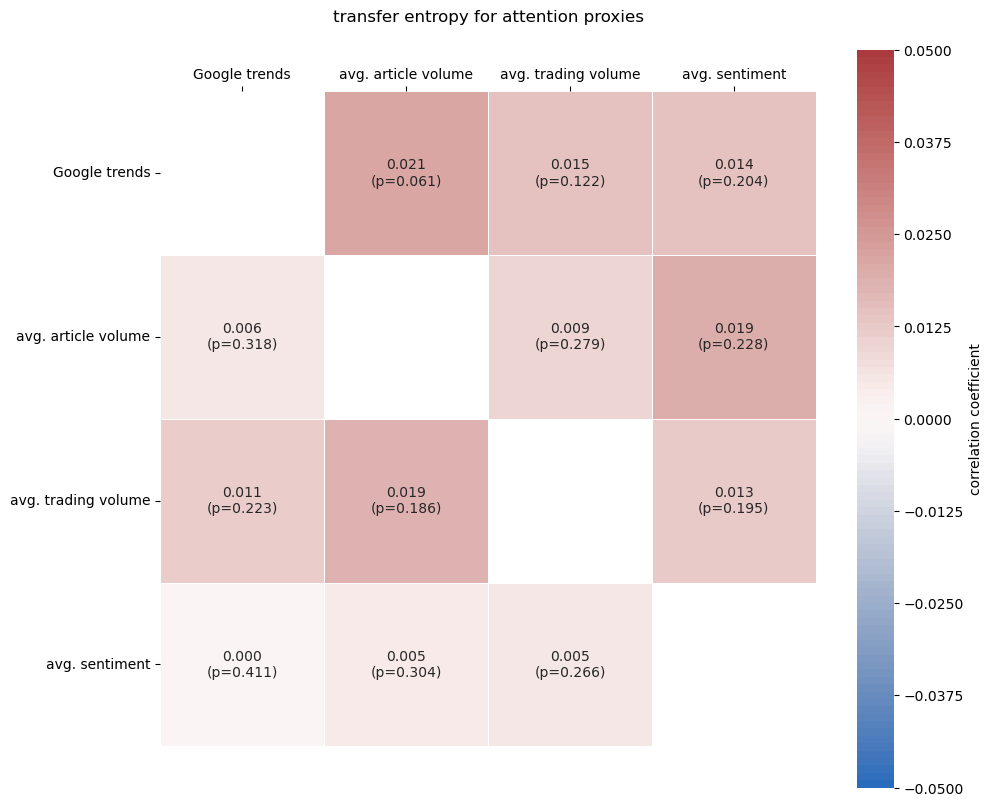

In [16]:
# Define a custom color palette
num_bins = 100
blue_gradient = sns.color_palette("vlag",  num_bins)
# blue_gradient.insert(0, (1, 1, 1))  # insert white at the beginning for -0.1
custom_cmap_visible = LinearSegmentedColormap.from_list('custom_blue', blue_gradient, N=num_bins)
norm = Normalize(vmin=-0.05, vmax=0.05)  # Normalizing from -0.1 to 1

# Define precision variables
prec1 = 3
prec2 = 3

# Define the matrix with format placeholders
annot = np.array([['', '{:.{prec1}f}\n(p={:.{prec2}f})'.format(stat_GA, pVal_GA, prec1=prec1, prec2=prec2), '{:.{prec1}f}\n(p={:.{prec2}f})'.format(stat_GT, pVal_GT, prec1=prec1, prec2=prec2), '{:.{prec1}f}\n(p={:.{prec2}f})'.format(stat_GS, pVal_GS, prec1=prec1, prec2=prec2)],
                    ['{:.{prec1}f}\n(p={:.{prec2}f})'.format(stat_AG, pVal_AG, prec1=prec1, prec2=prec2), '', '{:.{prec1}f}\n(p={:.{prec2}f})'.format(stat_AT, pVal_AT, prec1=prec1, prec2=prec2), '{:.{prec1}f}\n(p={:.{prec2}f})'.format(stat_AS, pVal_AS, prec1=prec1, prec2=prec2)],
                    ['{:.{prec1}f}\n(p={:.{prec2}f})'.format(stat_TG, pVal_TG, prec1=prec1, prec2=prec2), '{:.{prec1}f}\n(p={:.{prec2}f})'.format(stat_TA, pVal_TA, prec1=prec1, prec2=prec2), '', '{:.{prec1}f}\n(p={:.{prec2}f})'.format(stat_TS, pVal_TS, prec1=prec1, prec2=prec2)],
                    ['{:.{prec1}f}\n(p={:.{prec2}f})'.format(stat_SG, pVal_SG, prec1=prec1, prec2=prec2), '{:.{prec1}f}\n(p={:.{prec2}f})'.format(stat_SA, pVal_SA, prec1=prec1, prec2=prec2), '{:.{prec1}f}\n(p={:.{prec2}f})'.format(stat_ST, pVal_ST, prec1=prec1, prec2=prec2), '']])


# Plotting
# sns.set_theme(style="white")
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(teMatrix, cmap=custom_cmap_visible, norm=norm, annot=annot, fmt='', xticklabels=labels, yticklabels=labels,
                      cbar_kws={"ticks": np.linspace(-0.05, 0.05, 9), 'label': 'correlation coefficient'}, linewidths=.5, square=True)

# Move the x-axis to the top of the figure
heatmap.xaxis.tick_top()
heatmap.xaxis.set_label_position('top')

# Adjust the x-axis labels to be horizontal and for two lines
plt.xticks(rotation=0, ha='center')
plt.yticks(rotation=0)
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize=10)
plt.tight_layout()

plt.title(f'transfer entropy for attention proxies', pad=50)

# Show the plot
plt.show()

In [37]:
# np.save('attentionProxies_npdata/transferEntropy0delay.npy', np.array([stat_GA, stat_GT, stat_GS, stat_AG, stat_AT, stat_AS, stat_TG, stat_TA, stat_TS, stat_SG, stat_SA, stat_ST]))
# np.save('attentionProxies_npdata/pValues0delay.npy', np.array([pVal_GA, pVal_GT, pVal_GS, pVal_AG, pVal_AT, pVal_AS, pVal_TG, pVal_TA, pVal_TS, pVal_SG, pVal_SA, pVal_ST]))

transferEntropy = np.load('attentionProxies_npdata/transferEntropy0delay.npy')
pValues = np.load('attentionProxies_npdata/pValues0delay.npy')

stat_GA = transferEntropy[0]
stat_GT = transferEntropy[1]
stat_GS = transferEntropy[2]
stat_AG = transferEntropy[3]
stat_AT = transferEntropy[4]
stat_AS = transferEntropy[5]
stat_TG = transferEntropy[6]
stat_TA = transferEntropy[7]
stat_TS = transferEntropy[8]
stat_SG = transferEntropy[9]
stat_SA = transferEntropy[10]
stat_ST = transferEntropy[11]

pVal_GA = pValues[0]
pVal_GT = pValues[1]
pVal_GS = pValues[2]
pVal_AG = pValues[3]
pVal_AT = pValues[4]
pVal_AS = pValues[5]
pVal_TG = pValues[6]
pVal_TA = pValues[7]
pVal_TS = pValues[8]
pVal_SG = pValues[9]
pVal_SA = pValues[10]
pVal_ST = pValues[11]


teMatrix = np.array([[np.NaN, stat_GA, stat_GT, stat_GS],[stat_AG, np.NaN, stat_AT, stat_AS],[stat_TG, stat_TA, np.NaN, stat_TS],[stat_SG, stat_SA, stat_ST, np.NaN]])

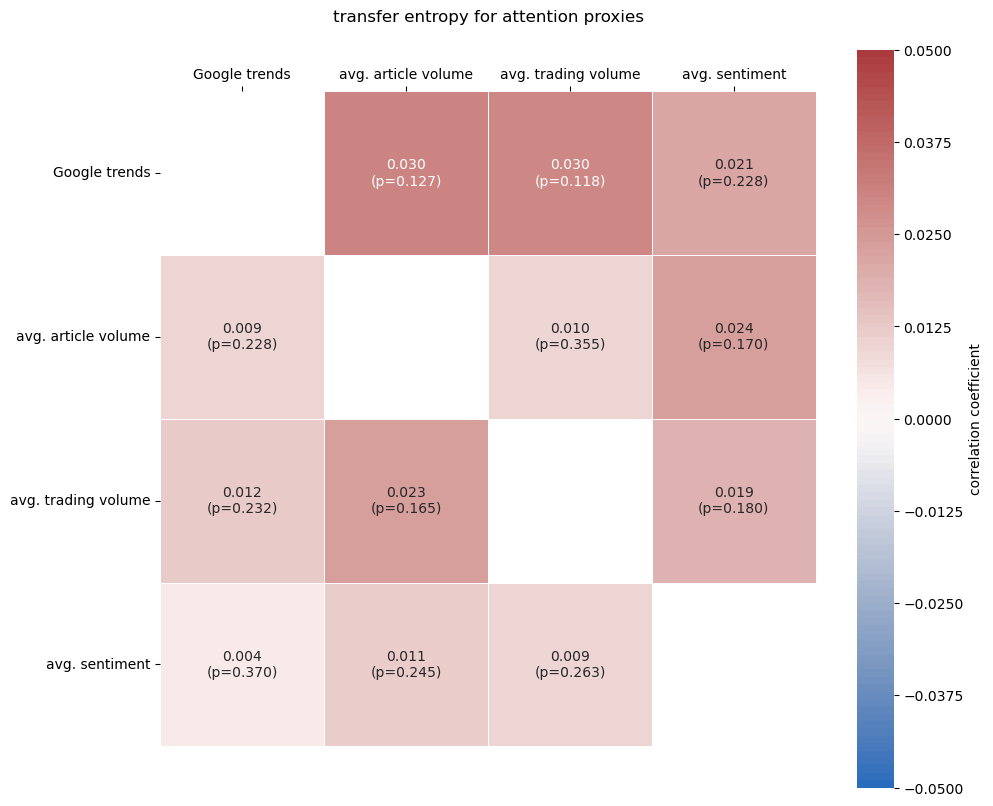

In [38]:
# Define a custom color palette
num_bins = 100
blue_gradient = sns.color_palette("vlag",  num_bins)
# blue_gradient.insert(0, (1, 1, 1))  # insert white at the beginning for -0.1
custom_cmap_visible = LinearSegmentedColormap.from_list('custom_blue', blue_gradient, N=num_bins)
norm = Normalize(vmin=-0.05, vmax=0.05)  # Normalizing from -0.1 to 1

# Define precision variables
prec1 = 3
prec2 = 3

# Define the matrix with format placeholders
annot = np.array([['', '{:.{prec1}f}\n(p={:.{prec2}f})'.format(stat_GA, pVal_GA, prec1=prec1, prec2=prec2), '{:.{prec1}f}\n(p={:.{prec2}f})'.format(stat_GT, pVal_GT, prec1=prec1, prec2=prec2), '{:.{prec1}f}\n(p={:.{prec2}f})'.format(stat_GS, pVal_GS, prec1=prec1, prec2=prec2)],
                    ['{:.{prec1}f}\n(p={:.{prec2}f})'.format(stat_AG, pVal_AG, prec1=prec1, prec2=prec2), '', '{:.{prec1}f}\n(p={:.{prec2}f})'.format(stat_AT, pVal_AT, prec1=prec1, prec2=prec2), '{:.{prec1}f}\n(p={:.{prec2}f})'.format(stat_AS, pVal_AS, prec1=prec1, prec2=prec2)],
                    ['{:.{prec1}f}\n(p={:.{prec2}f})'.format(stat_TG, pVal_TG, prec1=prec1, prec2=prec2), '{:.{prec1}f}\n(p={:.{prec2}f})'.format(stat_TA, pVal_TA, prec1=prec1, prec2=prec2), '', '{:.{prec1}f}\n(p={:.{prec2}f})'.format(stat_TS, pVal_TS, prec1=prec1, prec2=prec2)],
                    ['{:.{prec1}f}\n(p={:.{prec2}f})'.format(stat_SG, pVal_SG, prec1=prec1, prec2=prec2), '{:.{prec1}f}\n(p={:.{prec2}f})'.format(stat_SA, pVal_SA, prec1=prec1, prec2=prec2), '{:.{prec1}f}\n(p={:.{prec2}f})'.format(stat_ST, pVal_ST, prec1=prec1, prec2=prec2), '']])


# Plotting
# sns.set_theme(style="white")
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(teMatrix, cmap=custom_cmap_visible, norm=norm, annot=annot, fmt='', xticklabels=labels, yticklabels=labels,
                      cbar_kws={"ticks": np.linspace(-0.05, 0.05, 9), 'label': 'correlation coefficient'}, linewidths=.5, square=True)

# Move the x-axis to the top of the figure
heatmap.xaxis.tick_top()
heatmap.xaxis.set_label_position('top')

# Adjust the x-axis labels to be horizontal and for two lines
plt.xticks(rotation=0, ha='center')
plt.yticks(rotation=0)
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize=10)
plt.tight_layout()

plt.title(f'transfer entropy for attention proxies', pad=50)

# Show the plot
plt.show()